# Fine grained Plotting Features of Map

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/finegrained_plot.html

How to control various plotting features of map.

In [ ]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE

SkyCoord module provides flexible celestial coordinate representation and a
draw_limb method draws an edge as seen against the dark sky background. Date of the
image taken can also be displayed in the plot.

In [ ]:
aiamap = sunpy.map.Map(AIA_171_IMAGE)
bottom_left = SkyCoord(-400*u.arcsec, -900*u.arcsec, frame=aiamap.coordinate_frame)
top_right = SkyCoord(800*u.arcsec, 700*u.arcsec, frame=aiamap.coordinate_frame)
aiamap_sub = aiamap.submap(bottom_left, top_right=top_right)
title_obsdate = aiamap_sub.date.strftime('%Y-%b-%d %H:%M:%S')

In [ ]:
title_obsdate

'2011-Jun-07 06:33:02'

The sunpy map peek method shows a helioprojective  grid by default.
This is sometimes not desired, and instead a heliographic Stonyhurst grid might
be required. Although maps offer a simple way to include a Stonyhurst grid, often
times we want more control over the Stonyhurst type. The example below illustrates
some aspects of how a map plot can be altered as desired. For more information
regarding the axis and grid settings, go to [Ticks, tick labels and grid lines](https://docs.astropy.org/en/stable/visualization/wcsaxes/ticks_labels_grid.html) in astropy.

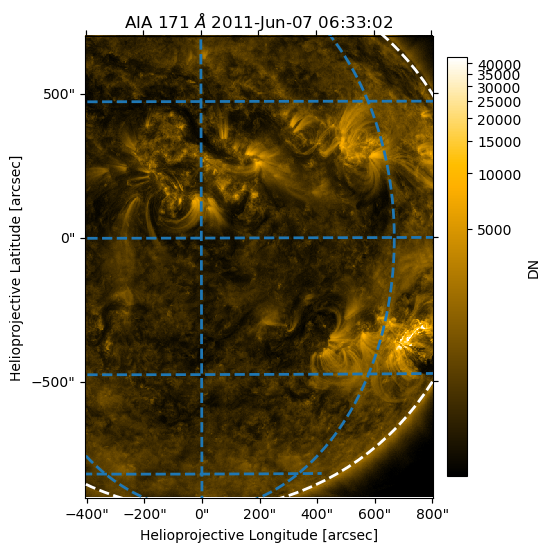

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection=aiamap_sub)
aiamap_sub.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)
aiamap_sub.draw_limb(axes=ax, color='white', linewidth=2, linestyle='dashed')

# To have more control over the Heliographic Stonyhurst grid,
# the axes object properties can be changed directly
overlay = ax.get_coords_overlay('heliographic_stonyhurst')
lon = overlay[0]
lat = overlay[1]

lon.set_ticks_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_ticklabel_visible(False)

lon.set_coord_type('longitude', coord_wrap=180 * u.deg)
lon.set_major_formatter('dd')

# Plot the Heliographic Stonyhurst grid
overlay.grid(color='tab:blue', linewidth=2, linestyle='dashed')
# Switch off the helioprojective grid
ax.grid(False)

# Change how the helioprojective grid tick labels are formatted
tx, ty = ax.coords
# Use integer coordinates for either axis.
tx.set_major_formatter('s')
ty.set_major_formatter('s')
ax.set_title(fr'AIA 171 $\AA$ {title_obsdate}')
ax.set_ylabel('Helioprojective Latitude [arcsec]')
ax.set_xlabel('Helioprojective Longitude [arcsec]')
plt.colorbar(fraction=0.045, pad=0.03, label='DN', ax=ax)

plt.show()